# Scatter-Plots-and-Correlations
## About
Learn exploratory data visualization — we'll learn about seasonality, scatter plots, and correlation.

## Goal
Find pattern and explain from the time series data about bike sharing

## Dataset
We'll use time series data about bike sharing (recall that a time series is a series of data points listed in time order).

Bike sharing companies allow people to rent bikes for short trips. Someone can rent a bike from a station near their location, take a ride, and then return the bike to any other station.

Our dataset describes the daily activity of Capital Bikeshare (a bike-sharing company). Let's take a look at the first five rows:

Each row describes the number of bike rentals for a single day and the corresponding weather. The data spans a period of two years (January 1, 2011 – December 31, 2012). Here are some of the columns we'll be focusing on:

- `dteday`: date in year-month-day format.
- `temp`: normalized temperature in Celsius (1 is the maximum value, and it's equivalent to 41 Celsius degrees).
- `atemp`: normalized feeling temperature in Celsius (1 is the maximum value, and it's equivalent to 50 Celsius degrees).
- `hum`: normalized humidity.
- `windspeed`: normalized wind speed.
- `casual`: the number of casual (non-registered) people who rented a bike that day.
- `registered`: the number of registered people who rented a bike that day (registered people bought a membership).
- `cnt`: the total number of people who rented a bike (casual plus registered).

Researcher [Hadi Fanaee-T](https://www.researchgate.net/profile/Hadi_Fanaee-T) collected the dataset, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

### 1. Bike Sharing Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv(r'.\Bike-Sharing-Dataset\day.csv')
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


'bike_sharing dataset' have 731 rows and 16 columns. No missing value

### 2. Exploring Data 
1. Plot two line graphs sharing the same x- and y-axis.
   - Line graph 1 is dteday-casual  
   - Line graph 2 is dteday-registered  
   - X-axis is `Date`, Y-axis is number of `Bikes Rented`
2. What differences and similarities do you see for the two line graphs?

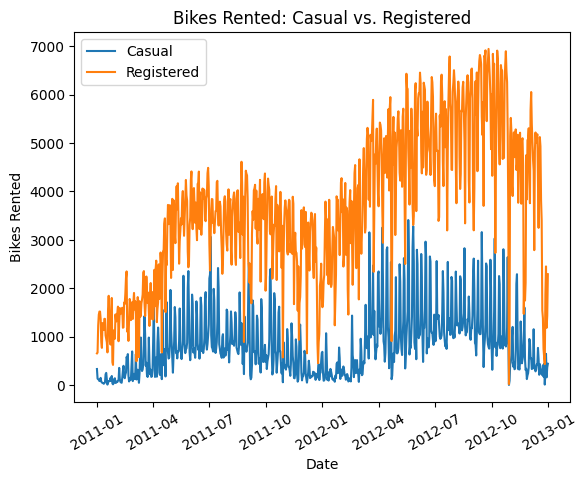

In [2]:
axis_x = pd.to_datetime(bike_sharing['dteday'])
# 'dteday' is object type, matplotlib may cause error. Convert to DataFrame
axis_y1=bike_sharing['casual']
axis_y2=bike_sharing['registered']
# column casual and registered are int64, no need to convert to DataFrame

plt.plot(axis_x,axis_y1,label='Casual')
plt.plot(axis_x,axis_y2,label='Registered')

plt.xticks(rotation=30)
plt.ylabel('Bikes Rented')
plt.xlabel('Date')
plt.title('Bikes Rented: Casual vs. Registered')
plt.legend()

plt.show()

### 3. Seasonal Trends
1. Plot a line graph with the `dteday` column on the x-axis and the `temp` column on the y-axis.
2. Rotate the x-ticks to an angle of 45 degrees using `plt.xticks()`.
3. Do you see any similarity in how the temperature and the number of bikes rented change?

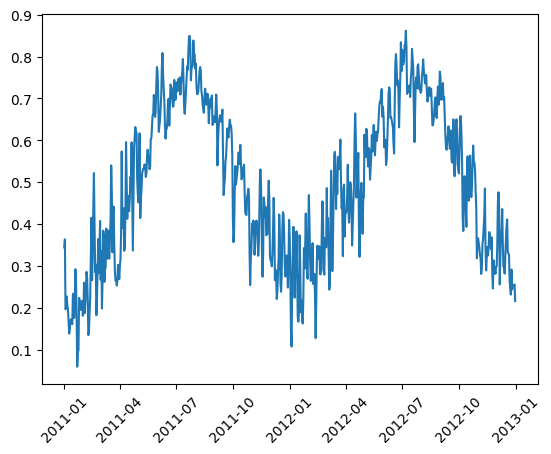

In [4]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
plt.plot(bike_sharing['dteday'],bike_sharing['temp'])
plt.xticks(rotation=45)
plt.show()

### 4. Scatter Plots
- Generate a scatter plot with `windspeed` and `cnt` columns
- Demonstrate correlation between wind speed and feeling temp
- Use Series.corr() and DataFrame.corr()

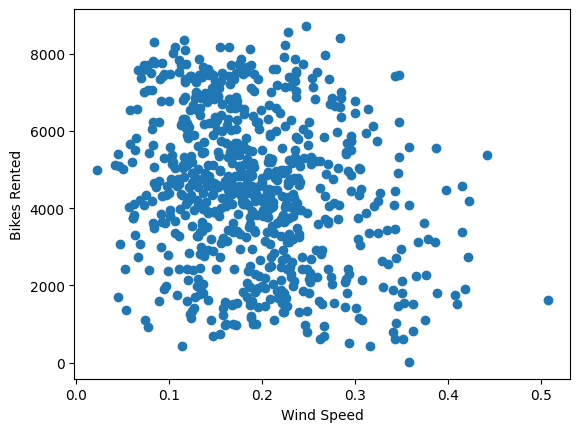

In [5]:
# Generate a scatter plot show the relationship of windspeed and Bikes Rented
bike_sharing['dteday']=pd.to_datetime(bike_sharing['dteday'])
plt.scatter(bike_sharing['windspeed'],bike_sharing['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.show()
# No direct correlation between windspeed and bike rentals

### 5. Correlation

1. Generate a scatter plot with the `atemp` column (feeling temperature) on the x-axis and the `registered` column on the y-axis.
2. What type of correlation do you see between the `atemp` and `registered` columns? Assign your answer to the variable correlation — choose between the strings `'positive'`, `'negative'`, and `'no correlation'`.

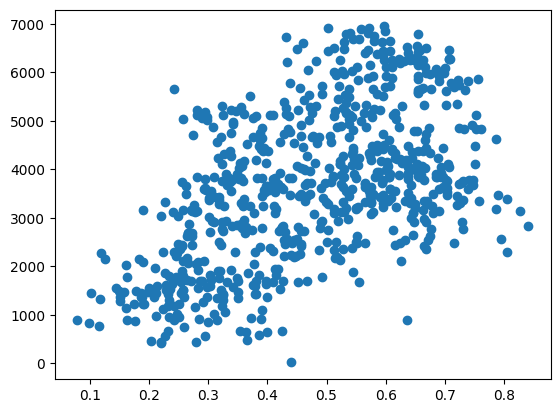

In [6]:
plt.scatter(bike_sharing['atemp'],bike_sharing['registered'])
plt.show()
correlation='positive'
# positive corelation between feeling temperature and bike registered

### 6. Pearson Correlation Coefficient
1. The correlation between `temp` and `cnt` is +0.63, so it's stronger than the correlation between `windspeed` and `cnt`, which is -0.23 (the two correlation values are real). Assign the Boolean `True` or `False` to `sentence_1`.
2. A correlation of +0.09 shows a weak positive correlation. Assign `True` or `False` to `sentence_2`.
3. A correlation of 0 shows a very weak negative correlation. Assign `True` or `False` to `sentence_3`.
4. A perfect positive correlation is equal in strength with a perfect negative correlation. Assign `True` or `False` to `sentence_4`.

In [ ]:
sentence_1=True
sentence_2=True
sentence_3=False
sentence_4=True

### 7. Measuring Pearson's R
1. Calculate the Pearson's r between the `temp` and `atemp` columns. Assign your answer to `temp_atemp_corr`.
2. Calculate the Pearson's r between the `windspeed` and `hum` columns. Assign your answer to `wind_hum_corr`.
3. Generate a scatter plot with the temp column on the x-axis and the atemp column on the y-axis.
- Add `'Air Temperature'` as an x-label.
- Add `'Feeling Temperature'` as an y-label.
4. Generate a scatter plot with the `windspeed` column on the x-axis and the `hum` column on the y-axis. You'll first need to close the previous scatter plot using plt.show()
- Add `'Wind Speed'` as an x-label.
- Add `'Humidity'` as an y-label.

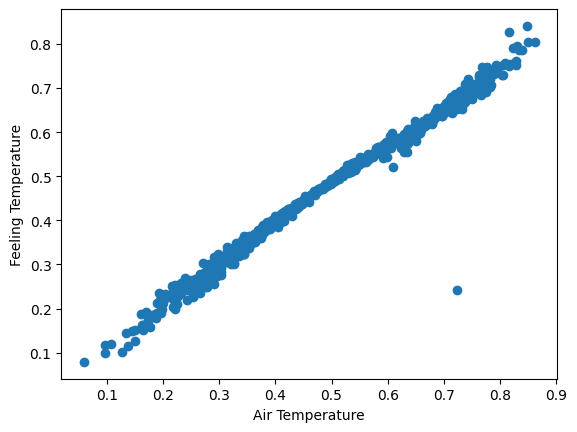

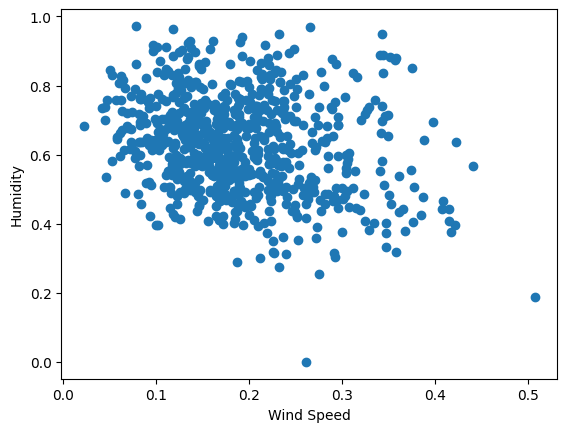

In [7]:
temp_atemp_corr=bike_sharing['temp'].corr(bike_sharing['atemp'])
wind_hum_corr=bike_sharing['windspeed'].corr(bike_sharing['hum'])

plt.scatter(bike_sharing['temp'],bike_sharing['atemp'])

plt.xlabel('Air Temperature')
plt.ylabel('Feeling Temperature')
plt.show()

plt.scatter(bike_sharing['windspeed'],bike_sharing['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()

### 8. Categorical Columns
Let's now do an exercise and continue the discussion on the next screen. We're going to use the weathersit column, which is categorical and has four unique values describing the weather:

1: clear or few clouds  
2: mist or cloudy  
3: light rain, light snow, thunderstorm  
4: heavy rain, snow, ice pellets, fog

Evaluate the following sentences.

In [8]:
# 1. The worse the weather, the higher the encoding number in the weathersit column. Assign True or False to sentence_1.
sentence_1=True

# 2. The correlation between weathersit and cnt is -0.30 — this means that as the weather gets worse, the number of bike rentals tends to decrease. Assign True or False to sentence_2.
print(bike_sharing.corr()['weathersit'][['cnt']])
sentence_2=True
# R=-0.3 > wether get worse > weathersit+, cnt- (negative)

# 3. The correlation between weathersit and hum is +0.59 — this means that as the humidity decreases, the weather tends to get better. Assign True or False to sentence_3.
print(bike_sharing.corr()['weathersit'][['hum']])
sentence_3=True
# R=+0.59> humidity-, weathersit- > weather get better (positive)

cnt   -0.297391
Name: weathersit, dtype: float64
hum    0.591045
Name: weathersit, dtype: float64
